In [ ]:
import pandas as pd
import tensorflow as tf




# New Section

In [ ]:
df = pd.read_csv('/content/Cross Road Analytics Competition Dataset.csv')
pd.set_option('display.max_rows', 100)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1158228, 34)

In [ ]:
df.value_counts()

Series([], dtype: int64)

In [ ]:
df['paid'].fillna("Missing", inplace=True)
df['paid'].unique()
df = df[ (df['paid'] != "P") & (df['paid'] != "Missing")]



In [ ]:
df1 = df.drop(['acct_id', 'section_name', 'row_name', 'SeatNum', 'price_code', 'SeatType', 'Start Year', 'LastYear', 'Sales_Source', 
              'event_date', 'SeatUniqueID', 'ClubExpYear', 'ResalePrice', 'ResaleDate', 'comp_name', 'add_datetime', "PC1"], axis=1)

In [ ]:
df1.head()

,acct_type_desc,event_name,plan_event_name,Price,paid,class_name,status,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,isAttended,Resold,isSTM
0,Season,CLT21HOU,21FS,111.0,Y,OPEN,SOLD,0,Manifest,NaN,Renewal,2021,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN
1,Season,CLT21HOU,21FS,111.0,Y,OPEN,SOLD,0,Manifest,NaN,Renewal,2021,20.0,CLT21HOU-101-10-10,No,NaN,NaN
2,Season,CLT21HOU,21FS,111.0,Y,OPEN,SOLD,0,Manifest,NaN,Renewal,2021,20.0,CLT21HOU-101-10-11,No,NaN,NaN
3,Season,CLT21HOU,21FS,111.0,Y,OPEN,SOLD,0,Manifest,NaN,Renewal,2021,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN
4,Season,CLT21HOU,21FS,111.0,Y,OPEN,SOLD,0,Manifest,NaN,Renewal,2021,32.0,CLT21HOU-101-10-13,No,NaN,NaN


In [ ]:
df.shape

(1018588, 34)

In [ ]:
df2 = pd.get_dummies(df1, columns=['acct_type_desc', 'event_name', 'status', 'TicketClass', 'Term',
                                          'plan_event_name'])
pd.set_option('display.max_columns', 150)
df2.head()
df2.columns

Index(['Price', 'paid', 'class_name', 'isHost', 'TicketType', 'Season',
       'Tenure', 'UniqueID', 'isAttended', 'Resold', 'isSTM',
       'acct_type_desc_Club', 'acct_type_desc_Comp', 'acct_type_desc_Employee',
       'acct_type_desc_Group', 'acct_type_desc_Group NEW',
       'acct_type_desc_Hold Account', 'acct_type_desc_House',
       'acct_type_desc_Huntington', 'acct_type_desc_Huntington 2014',
       'acct_type_desc_Huntington 2015', 'acct_type_desc_Huntington 2016',
       'acct_type_desc_Huntington 2017', 'acct_type_desc_Huntington 2018',
       'acct_type_desc_Huntington 2019', 'acct_type_desc_Huntington 2021',
       'acct_type_desc_Huntington 2022', 'acct_type_desc_IU 2022',
       'acct_type_desc_Kids Club', 'acct_type_desc_NONRENEWAL',
       'acct_type_desc_Opponents', 'acct_type_desc_Personal',
       'acct_type_desc_Player', 'acct_type_desc_SG Suite',
       'acct_type_desc_Season', 'acct_type_desc_Single Game',
       'acct_type_desc_Sponsor', 'acct_type_desc_Suite',

In [ ]:
df2.drop(['acct_type_desc_Huntington', 'acct_type_desc_Huntington 2014',
       'acct_type_desc_Huntington 2015', 'acct_type_desc_Huntington 2016',
       'acct_type_desc_Huntington 2017', 'acct_type_desc_Huntington 2018',
       'acct_type_desc_Huntington 2019', 'acct_type_desc_Huntington 2021', 'acct_type_desc_Opponents', 
         'acct_type_desc_SG Suite'], axis=1, inplace=True)
df2['Resold'].fillna(0, inplace=True)
df2['Resold'].replace({'Yes': 1}, inplace=True)
df2['isSTM'].fillna(0, inplace=True)
df2['btw0_50'] = [1 if 0 <= x <= 50 else 0 for x in df1['Price']]


In [ ]:
df2.head()

,Price,paid,class_name,isHost,TicketType,Season,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50
0,111.0,Y,OPEN,0,Renewal,2021,25.0,CLT21HOU-101-10-1,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,111.0,Y,OPEN,0,Renewal,2021,20.0,CLT21HOU-101-10-10,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,111.0,Y,OPEN,0,Renewal,2021,20.0,CLT21HOU-101-10-11,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,111.0,Y,OPEN,0,Renewal,2021,4.0,CLT21HOU-101-10-12,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,111.0,Y,OPEN,0,Renewal,2021,32.0,CLT21HOU-101-10-13,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Price range from 0 - 800 dollars, I break in in chunk of range 50 so we have 16 categories

df2['btw51_100'] = [1 if 51 <= x <= 100 else 0 for x in df2['Price']]
df2['btw101_150'] = [1 if 101 <= x <= 150 else 0 for x in df2['Price']]
df2['btw151_200'] = [1 if 151 <= x <= 200 else 0 for x in df2['Price']]
df2['btw201_250'] = [1 if 201 <= x <= 250 else 0 for x in df2['Price']]
df2['btw251_300'] = [1 if 251 <= x <= 300 else 0 for x in df2['Price']]
df2['btw301_350'] = [1 if 301 <= x <= 350 else 0 for x in df2['Price']]
df2['btw351_400'] = [1 if 351 <= x <= 400 else 0 for x in df2['Price']]
df2['btw401_450'] = [1 if 401 <= x <= 450 else 0 for x in df2['Price']]
df2['btw451_500'] = [1 if 451 <= x <= 500 else 0 for x in df2['Price']]
df2['btw501_550'] = [1 if 501 <= x <= 550 else 0 for x in df2['Price']]
df2['btw551_600'] = [1 if 551 <= x <= 600 else 0 for x in df2['Price']]
df2['btw601_650'] = [1 if 601 <= x <= 650 else 0 for x in df2['Price']]
df2['btw651_700'] = [1 if 651 <= x <= 700 else 0 for x in df2['Price']]
df2['btw701_750'] = [1 if 701 <= x <= 750 else 0 for x in df2['Price']]
df2['btw751_800'] = [1 if 751 <= x <= 800 else 0 for x in df2['Price']]

In [ ]:
df.Price.max()

780.0

In [ ]:
df.Price.min()

0.0

In [ ]:
df2.head(500)

,Price,paid,class_name,isHost,TicketType,Season,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800
0,111.0,Y,OPEN,0,Renewal,2021,25.0,CLT21HOU-101-10-1,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,111.0,Y,OPEN,0,Renewal,2021,20.0,CLT21HOU-101-10-10,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,111.0,Y,OPEN,0,Renewal,2021,20.0,CLT21HOU-101-10-11,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,111.0,Y,OPEN,0,Renewal,2021,4.0,CLT21HOU-101-10-12,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,111.0,Y,OPEN,0,Renewal,2021,32.0,CLT21HOU-101-10-13,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,111.0,N,OPEN,0,Sponsor,2021,19.0,CLT21HOU-101-30-7,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
498,111.0,N,OPEN,0,Sponsor,2021,19.0,CLT21HOU-101-30-8,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
499,111.0,N,OPEN,0,Sponsor,2021,19.0,CLT21HOU-101-30-9,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
500,111.0,Y,OPEN,0,Renewal,2021,18.0,CLT21HOU-101-31-1,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dropping season columns
df2.drop(['Season'], axis=1, inplace=True)
df2.head()


,Price,paid,class_name,isHost,TicketType,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800
0,111.0,Y,OPEN,0,Renewal,25.0,CLT21HOU-101-10-1,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,111.0,Y,OPEN,0,Renewal,20.0,CLT21HOU-101-10-10,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,111.0,Y,OPEN,0,Renewal,20.0,CLT21HOU-101-10-11,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,111.0,Y,OPEN,0,Renewal,4.0,CLT21HOU-101-10-12,Yes,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,111.0,Y,OPEN,0,Renewal,32.0,CLT21HOU-101-10-13,No,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.isAttended.replace({"Yes" : 1, "No" : 0}, inplace=True)
df2.isAttended.unique()
df2.shape
df3 = df2[df2["isAttended"] != "???"]
df3.shape
df3.isAttended.unique()

array([1, 0])

In [ ]:
df3.paid.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df3.paid.replace({"Y" : 1, "N": 0}, inplace=True)
df3.paid.unique()

array([1, 0])

In [ ]:
df3.TicketType.unique()

array(['Renewal', 'Comp', 'Employee', 'Sponsor', 'New', 'Broker', 'Group',
       'SingleGame', 'Opponents', 'Player', 'Existing', 'Other SOLD',
       'Upgrade', 'Other', 'FlexPack', 'Marketing'], dtype=object)

In [ ]:
df3.head()

,Price,paid,class_name,isHost,TicketType,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21LV,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22HOU,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,bt201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800
0,111.0,1,OPEN,0,Renewal,25.0,CLT21HOU-101-10-1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,111.0,1,OPEN,0,Renewal,20.0,CLT21HOU-101-10-10,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,111.0,1,OPEN,0,Renewal,20.0,CLT21HOU-101-10-11,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,111.0,1,OPEN,0,Renewal,4.0,CLT21HOU-101-10-12,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,111.0,1,OPEN,0,Renewal,32.0,CLT21HOU-101-10-13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3.shape

(1018588, 82)

In [ ]:
df5 = df[df['TicketType']== "Comp"| df['TicketType'] == 'Group'| 
                                 df['TicketType']== "Sponsor"| df['TicketType']== "SingleGame"| 
                                 df['TicketType']== "Player"| df['TicketType']== "Other SOLD"|
                                 df['TicketType']== "Upgrade"| df['TicketType']== "Other"| 
                                 df['TicketType']== "FlexPack"| df['TicketType']== "Marketing"]
df5.head()

TypeError: ignored

In [ ]:
df3["TicketType_Rest"] = np.where(df['TicketType']== "Comp"| df['TicketType'] == 'Group'| 
                                 df['TicketType']== "Sponsor"| df['TicketType']== "SingleGame"| 
                                 df['TicketType']== "Player"| df['TicketType']== "Other SOLD"|
                                 df['TicketType']== "Upgrade"| df['TicketType']== "Other"| 
                                 df['TicketType']== "FlexPack"| df['TicketType']== "Marketing", 1, 0)


TypeError: ignored

In [ ]:
df["TicketType_Rest"].unique()

array([0, 1])

In [ ]:
# 'Renewal','New', 'Broker', 'Group', ' Employee', 'Existing', 'Opponents'
df3 = df3[(df3["TicketType"] == "Renewal")  |
      (df3["TicketType"] == "New") |
    (df3["TicketType"] == "Broker") |
    (df3["TicketType"] == "Group") |
    (df3["TicketType"] == "Employee") |
    (df3["TicketType"] == "Existing") |
    (df3["TicketType"] == "Opponents")]
df3.head()
df3.TicketType.unique()

array(['Renewal', 'Employee', 'New', 'Broker', 'Group', 'Opponents',
       'Existing'], dtype=object)

In [ ]:
df3.class_name.unique()

array(['OPEN', 'ACCMAN RELO', 'TICKET OPS', 'JIM IRSAY', 'ADA',
       'ACCOUNT MANAGER', 'DIST-OPEN', 'SEASON', 'GROUP',
       'SINGLE GAME HOLD', 'JODY', 'PLAYERS', 'ADA INF', 'MEGAN', 'GREG',
       'DOQ-BRDCSTHOLD', 'VISITING TEAM', 'HANNAH', 'SPINZO2', 'ROMINE',
       'BROADCAST', 'DIST-DHOLD', 'SPONSORS', 'OBSTRUCTED', 'SPINZO1',
       'HUNTINGTON', 'DDQ-BRDCSTHOLD', 'DIST-7HOLD', 'EVENTS', 'NO HOLD',
       'GENTILE', 'COACH', 'VT SELL', 'MISC'], dtype=object)

In [ ]:
# drop ada, ada inf, broadcast, coach, ddq, dist-dhold, ddq aand dist, ca_minicamp, gentile 

In [ ]:
df3.head()

,Price,paid,class_name,isHost,TicketType,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21LV,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22HOU,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,bt201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800
0,111.0,1,OPEN,0,Renewal,25.0,CLT21HOU-101-10-1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,111.0,1,OPEN,0,Renewal,20.0,CLT21HOU-101-10-10,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,111.0,1,OPEN,0,Renewal,20.0,CLT21HOU-101-10-11,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,111.0,1,OPEN,0,Renewal,4.0,CLT21HOU-101-10-12,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,111.0,1,OPEN,0,Renewal,32.0,CLT21HOU-101-10-13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop the price
df3.shape

(1018588, 80)

In [ ]:
df4 = pd.get_dummies(df3 , columns = ['TicketType' , 'class_name'])
df4.head() 

,Price,paid,isHost,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_Broker,TicketType_Employee,TicketType_Existing,TicketType_Group,TicketType_New,TicketType_Opponents,TicketType_Renewal,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-7HOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_HUNTINGTON,class_name_JIM IRSAY,class_name_JODY,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_VISITING TEAM,class_name_VT SELL
0,111.0,1,0,25.0,CLT21HOU-101-10-1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,111.0,1,0,20.0,CLT21HOU-101-10-10,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,111.0,1,0,20.0,CLT21HOU-101-10-11,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,111.0,1,0,4.0,CLT21HOU-101-10-12,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,111.0,1,0,32.0,CLT21HOU-101-10-13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4.shape

(915276, 119)

In [ ]:

df4.columns

Index(['Price', 'paid', 'isHost', 'Tenure', 'UniqueID', 'isAttended', 'Resold',
       'isSTM', 'acct_type_desc_Club', 'acct_type_desc_Comp',
       ...
       'class_name_ROMINE', 'class_name_SEASON', 'class_name_SINGLE GAME HOLD',
       'class_name_SPINZO1', 'class_name_SPINZO2', 'class_name_SPONSORS',
       'class_name_TICKET OPS', 'class_name_VISITING TEAM',
       'class_name_VT SELL', 'class_name_WAIT WEB'],
      dtype='object', length=131)

In [ ]:
# 'Renewal','New', 'Broker', 'Group', ' Employee', 'Existing', 'Opponents'
# drop ada, ada inf, broadcast, coach, ddq, dist-dhold, ddq aand dist, ca_minicamp, gentile 
df4.drop(columns = [ 'class_name_ADA', 'class_name_ADA INF', 'class_name_BROADCAST', 'class_name_COACH' , 	'class_name_DDQ-BRDCSTHOLD' , 'class_name_DIST-7HOLD'
                    , 'class_name_DIST-DHOLD' , 'class_name_DIST-OPEN' , 'class_name_DOQ-BRDCSTHOLD' , 'class_name_GENTILE'])
#'TicketType_Comp', 'TicketType_FlexPack', 'TicketType_Marketing' , 'TicketType_Other' , 'TicketType_Other SOLD' , 'TicketType_Player', 'TicketType_SingleGame', 'TicketType_Sponsor' , 'TicketType_Upgrade', 

,Price,paid,isHost,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_Broker,TicketType_Employee,TicketType_Existing,TicketType_Group,TicketType_New,TicketType_Opponents,TicketType_Renewal,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_EVENTS,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_HUNTINGTON,class_name_JIM IRSAY,class_name_JODY,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_VISITING TEAM,class_name_VT SELL
0,111.0,1,0,25.0,CLT21HOU-101-10-1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,111.0,1,0,20.0,CLT21HOU-101-10-10,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,111.0,1,0,20.0,CLT21HOU-101-10-11,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,111.0,1,0,4.0,CLT21HOU-101-10-12,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,111.0,1,0,32.0,CLT21HOU-101-10-13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158220,48.0,1,0,1.0,CLT22WAS-646-9-2,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1158221,48.0,1,0,1.0,CLT22WAS-646-9-3,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0

In [ ]:
df4.shape

(915276, 117)

In [ ]:
df4.drop(['Price'], axis = 1 , inplace = True)


In [ ]:
df4.head()

,paid,isHost,Tenure,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_Broker,TicketType_Employee,TicketType_Existing,TicketType_Group,TicketType_New,TicketType_Opponents,TicketType_Renewal,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-7HOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_HUNTINGTON,class_name_JIM IRSAY,class_name_JODY,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_VISITING TEAM,class_name_VT SELL
0,1,0,25.0,CLT21HOU-101-10-1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,20.0,CLT21HOU-101-10-10,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,20.0,CLT21HOU-101-10-11,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,4.0,CLT21HOU-101-10-12,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,32.0,CLT21HOU-101-10-13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4.drop(['Tenure'], axis=1, inplace=True)
df4.head()

,paid,isHost,UniqueID,isAttended,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_Hold Account,acct_type_desc_House,acct_type_desc_Huntington 2022,acct_type_desc_IU 2022,acct_type_desc_Kids Club,acct_type_desc_NONRENEWAL,acct_type_desc_Personal,acct_type_desc_Player,acct_type_desc_Season,acct_type_desc_Single Game,acct_type_desc_Sponsor,acct_type_desc_Suite,event_name_CLT21HOU,event_name_CLT21JAX,event_name_CLT21LAR,event_name_CLT21NE,event_name_CLT21NYJ,event_name_CLT21PRE,event_name_CLT21SEA,event_name_CLT21TB,event_name_CLT21TEN,event_name_CLT22JAX,event_name_CLT22KC,event_name_CLT22LAC,event_name_CLT22PHI,event_name_CLT22PIT,event_name_CLT22PR1,event_name_CLT22PR2,event_name_CLT22TEN,event_name_CLT22WAS,status_COMP,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_Broker,TicketType_Employee,TicketType_Existing,TicketType_Group,TicketType_New,TicketType_Opponents,TicketType_Renewal,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-7HOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_HUNTINGTON,class_name_JIM IRSAY,class_name_JODY,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_VISITING TEAM,class_name_VT SELL
0,1,0,CLT21HOU-101-10-1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,CLT21HOU-101-10-10,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,CLT21HOU-101-10-11,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,CLT21HOU-101-10-12,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,CLT21HOU-101-10-13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_csv = pd.read_csv('/content/test.csv')
test_csv.head()




/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,Resold,ResalePrice,ResaleDate,isSTM
0,117948790,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,1,FR,...,Renewal,101-10-1,2021,NaN,25.0,CLT21LV-101-10-1,NaN,NaN,NaN,NaN
1,126665090,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,10,FR,...,Renewal,101-10-10,2021,NaN,20.0,CLT21LV-101-10-10,NaN,NaN,NaN,NaN
2,126665090,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,11,FR,...,Renewal,101-10-11,2021,NaN,20.0,CLT21LV-101-10-11,NaN,NaN,NaN,NaN
3,1489599590,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,12,FR,...,Renewal,101-10-12,2021,NaN,4.0,CLT21LV-101-10-12,NaN,NaN,NaN,NaN
4,115101990,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,13,FR,...,Renewal,101-10-13,2021,NaN,32.0,CLT21LV-101-10-13,NaN,NaN,NaN,NaN


In [ ]:
test_csv.UniqueID[1]

'CLT21LV-101-10-10'

In [ ]:
test_csv.shape


(128692, 2)

In [ ]:
pd.set_option('display.max_columns', 150)

def preprocessing_data(dataframe):
  dataframe = dataframe.copy()
  dataframe['paid'].fillna("Missing", inplace=True)
  dataframe.paid.replace({"P": 0,
                          "Missing": 0}, inplace=True)
  
  df1 = dataframe.drop(['acct_id', 'section_name', 'row_name', 'SeatNum', 'price_code', 'SeatType', 'Start Year', 'LastYear', 'Sales_Source', 
              'event_date', 'SeatUniqueID', 'ClubExpYear', 'ResalePrice', 'ResaleDate', 'comp_name', 'add_datetime', "PC1", 'event_name'], axis=1)
  
  df2 = pd.get_dummies(df1, columns=['acct_type_desc', 'status', 'TicketClass', 'Term',
                                          'plan_event_name'])
  
  df2.drop(['acct_type_desc_Huntington', 'acct_type_desc_Huntington 2014',
       'acct_type_desc_Huntington 2015', 'acct_type_desc_Huntington 2016',
       'acct_type_desc_Huntington 2017', 'acct_type_desc_Huntington 2018',
       'acct_type_desc_Huntington 2019', 'acct_type_desc_Huntington 2021', 'acct_type_desc_Opponents', 
         'acct_type_desc_SG Suite', 'Season'], axis=1, inplace=True)
  df2['Resold'].fillna(0, inplace=True)
  df2['Resold'].replace({'Yes': 1}, inplace=True)
  df2['isSTM'].fillna(0, inplace=True)


  df2['btw0_50'] = [1 if 0 <= x <= 50 else 0 for x in df2['Price']]
  df2['btw51_100'] = [1 if 51 <= x <= 100 else 0 for x in df2['Price']]
  df2['btw101_150'] = [1 if 101 <= x <= 150 else 0 for x in df2['Price']]
  df2['btw151_200'] = [1 if 151 <= x <= 200 else 0 for x in df2['Price']]
  df2['btw201_250'] = [1 if 201 <= x <= 250 else 0 for x in df2['Price']]
  df2['btw251_300'] = [1 if 251 <= x <= 300 else 0 for x in df2['Price']]
  df2['btw301_350'] = [1 if 301 <= x <= 350 else 0 for x in df2['Price']]
  df2['btw351_400'] = [1 if 351 <= x <= 400 else 0 for x in df2['Price']]
  df2['btw401_450'] = [1 if 401 <= x <= 450 else 0 for x in df2['Price']]
  df2['btw451_500'] = [1 if 451 <= x <= 500 else 0 for x in df2['Price']]
  df2['btw501_550'] = [1 if 501 <= x <= 550 else 0 for x in df2['Price']]
  df2['btw551_600'] = [1 if 551 <= x <= 600 else 0 for x in df2['Price']]
  df2['btw601_650'] = [1 if 601 <= x <= 650 else 0 for x in df2['Price']]
  df2['btw651_700'] = [1 if 651 <= x <= 700 else 0 for x in df2['Price']]
  df2['btw701_750'] = [1 if 701 <= x <= 750 else 0 for x in df2['Price']]
  df2['btw751_800'] = [1 if 751 <= x <= 800 else 0 for x in df2['Price']]

  df2.isAttended.replace({"Yes" : 1, "No" : 0}, inplace=True)
  df3 = df2[df2["isAttended"] != "???"]
  df3.paid.replace({"Y" : 1, "N": 0}, inplace=True)
 
	
  df4 = pd.get_dummies(df3 , columns = ['TicketType' , 'class_name'])

  df4.drop(columns = ['TicketType_Comp', 'TicketType_FlexPack', 'TicketType_Marketing' , 'TicketType_Other' , 'TicketType_Other SOLD' ,
                    'TicketType_Player', 'TicketType_SingleGame', 'TicketType_Sponsor' , 'TicketType_Upgrade', 
                    'class_name_ADA', 'class_name_ADA INF', 'class_name_BROADCAST', 'class_name_COACH' , 	'class_name_DDQ-BRDCSTHOLD' , 'class_name_DIST-7HOLD'
                    , 'class_name_DIST-DHOLD' , 'class_name_DIST-OPEN' , 'class_name_DOQ-BRDCSTHOLD' , 'class_name_GA_MINICAMP' , 'class_name_GENTILE'])
					
  df4.drop(['Price' , 'Tenure', "acct_type_desc_Hold Account",
            "acct_type_desc_Huntington 2022", 'acct_type_desc_IU 2022',
            'acct_type_desc_Kids Club', 'acct_type_desc_NONRENEWAL',
            'class_name_DIST-7HOLD', 
            'class_name_GA_MINICAMP', 'class_name_HUNTINGTON',
            'class_name_INDIANA', "acct_type_desc_Hold", "acct_type_desc_Personal",
            "acct_type_desc_Player", "acct_type_desc_Premium", 
            "acct_type_desc_Season", "acct_type_desc_Single Game", "TicketType_Premium Avail",
            "class_name_DIST-EXCP", "class_name_DIST-WIP",
            "class_name_DOQ-WHEELCHAIR", "class_name_OB2", "class_name_OWNERSHIP", "acct_type_desc_Window Account", "UniqueID"], axis = 1 , inplace = True)

  print(df4.head())
					
  #df4.drop(['Tenure'], axis=1, inplace=True)
  return df4

In [ ]:
pd.set_option('display.max_columns', 150)

def preprocessing_evaluate(dataframe):
  dataframe1 = dataframe.copy()
  dataframe1['paid'].fillna("Missing", inplace=True)
  dataframe1.paid.replace({"P": 0,
                          "Missing": 0}, inplace=True)
  
  df5 = dataframe1.drop(["event_name", 'acct_id', 'section_name', 'row_name', 'SeatNum', 'price_code', 'SeatType', 'Start Year', 'LastYear', 'Sales_Source', 
              'event_date', 'SeatUniqueID', 'ClubExpYear', 'ResalePrice', 'ResaleDate', 'comp_name', 'add_datetime', "PC1"], axis=1)
  df6 = pd.get_dummies(df5, columns=['acct_type_desc',  'status', 'TicketClass', 'Term',
                                          'plan_event_name'])
  df6.drop(['acct_type_desc_Huntington 2018',
       'acct_type_desc_Huntington 2019' , 'acct_type_desc_Opponents', 
         'acct_type_desc_SG Suite', 'Season'], axis=1, inplace=True)
  df6['Resold'].fillna(0, inplace=True)
  df6['Resold'].replace({'Yes': 1}, inplace=True)
  df6['isSTM'].fillna(0, inplace=True)
  df6['btw0_50'] = [1 if 0 <= x <= 50 else 0 for x in df6['Price']]

  df6['btw51_100'] = [1 if 51 <= x <= 100 else 0 for x in df6['Price']]
  df6['btw101_150'] = [1 if 101 <= x <= 150 else 0 for x in df6['Price']]
  df6['btw151_200'] = [1 if 151 <= x <= 200 else 0 for x in df6['Price']]
  df6['btw201_250'] = [1 if 201 <= x <= 250 else 0 for x in df6['Price']]
  df6['btw251_300'] = [1 if 251 <= x <= 300 else 0 for x in df6['Price']]
  df6['btw301_350'] = [1 if 301 <= x <= 350 else 0 for x in df6['Price']]
  df6['btw351_400'] = [1 if 351 <= x <= 400 else 0 for x in df6['Price']]
  df6['btw401_450'] = [1 if 401 <= x <= 450 else 0 for x in df6['Price']]
  df6['btw451_500'] = [1 if 451 <= x <= 500 else 0 for x in df6['Price']]
  df6['btw501_550'] = [1 if 501 <= x <= 550 else 0 for x in df6['Price']]
  df6['btw551_600'] = [1 if 551 <= x <= 600 else 0 for x in df6['Price']]
  df6['btw601_650'] = [1 if 601 <= x <= 650 else 0 for x in df6['Price']]
  df6['btw651_700'] = [1 if 651 <= x <= 700 else 0 for x in df6['Price']]
  df6['btw701_750'] = [1 if 701 <= x <= 750 else 0 for x in df6['Price']]
  df6['btw751_800'] = [1 if 751 <= x <= 800 else 0 for x in df6['Price']]

  
  df6.paid.replace({"Y" : 1, "N": 0}, inplace=True)
  
	
  df8 = pd.get_dummies(df6 , columns = ['TicketType' , 'class_name'])

  df8.drop(columns = ['TicketType_Comp', 'TicketType_FlexPack', 'TicketType_Marketing' , 'TicketType_Other' , 'TicketType_Other SOLD' ,
                    'TicketType_Player', 'TicketType_SingleGame', 'TicketType_Sponsor' , 'TicketType_Upgrade', 
                    'class_name_ADA', 'class_name_ADA INF', 'class_name_BROADCAST', 'class_name_COACH' , 	'class_name_DDQ-BRDCSTHOLD' ,
                     'class_name_DOQ-BRDCSTHOLD' , 'class_name_GENTILE'])
					
  df8.drop(['Price' , 'Tenure',  'class_name_ABBEY',  'class_name_GROUP MANAGER',
            "acct_type_desc_Huntington 2014", "acct_type_desc_Huntington 2016", 
"acct_type_desc_Kids Club", "acct_type_desc_Personal", "acct_type_desc_Player", "acct_type_desc_Season",
"acct_type_desc_Single Game", "UniqueID"], axis = 1 , inplace = True)
  
  print(df8.head())
  
  return df8

In [ ]:
from sklearn import preprocessing
final_data = preprocessing_data(df)
final_data.shape

isAttended_col = final_data["isAttended"]
final_data = final_data.drop(columns=['isAttended'])

final_data.head()


   paid  isHost  isAttended Resold  isSTM  acct_type_desc_Club  \
0     1       0           1      0    0.0                    0   
1     1       0           0      0    0.0                    0   
2     1       0           0      0    0.0                    0   
3     1       0           1      0    0.0                    0   
4     1       0           0      0    0.0                    0   

   acct_type_desc_Comp  acct_type_desc_Employee  acct_type_desc_Group  \
0                    0                        0                     0   
1                    0                        0                     0   
2                    0                        0                     0   
3                    0                        0                     0   
4                    0                        0                     0   

   acct_type_desc_Group NEW  acct_type_desc_House  acct_type_desc_Sponsor  \
0                         0                     0                       0   
1         

,paid,isHost,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST
0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Trying with PCA that we apply to first part then apply it to the test csv
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(final_data)



PCA(n_components=0.95)

**bold text** VISUALIZE THE DATASET


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


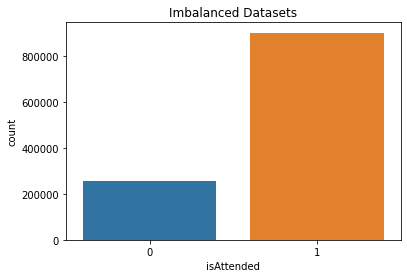

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('isAttended', data=final_data)
plt.title("Imbalanced Datasets")
plt.show()

In [ ]:
print(pd.value_counts(final_data.isAttended))

## The dataset is highly biased towards the people who attended

1    900945
0    257283
Name: isAttended, dtype: int64


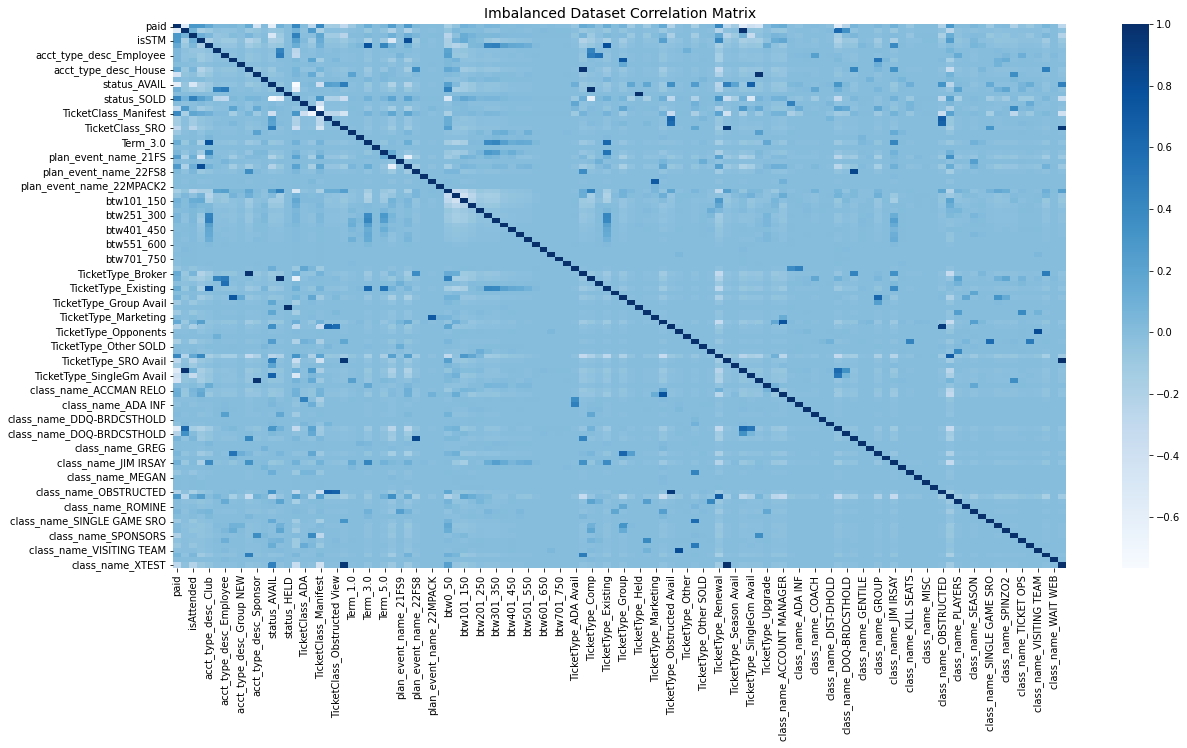

In [ ]:
# Find the correlation of the data
fig, ax = plt.subplots(figsize=(20,10))
corr = final_data.corr()
sns.heatmap(corr, cmap="Blues", ax=ax)
ax.set_title("Imbalanced Dataset Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
test_csv.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,Resold,ResalePrice,ResaleDate,isSTM
0,117948790,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,1,FR,F,135,Y,3/31/21 16:08,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21LV-101-10-1,NaN,NaN,NaN,NaN
1,126665090,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,10,FR,F,135,Y,3/31/21 16:08,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-10,2021,NaN,20.0,CLT21LV-101-10-10,NaN,NaN,NaN,NaN
2,126665090,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,11,FR,F,135,Y,3/31/21 16:08,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-11,2021,NaN,20.0,CLT21LV-101-10-11,NaN,NaN,NaN,NaN
3,1489599590,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,12,FR,F,135,Y,3/31/21 16:10,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-12,2021,NaN,4.0,CLT21LV-101-10-12,NaN,NaN,NaN,NaN
4,115101990,Season,CLT21LV,1/2/22,21FS,Not Comp,101,10,13,FR,F,135,Y,3/31/21 16:08,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-13,2021,NaN,32.0,CLT21LV-101-10-13,NaN,NaN,NaN,NaN


In [ ]:
test_dataframe = preprocessing_evaluate(test_csv)
test_dataframe.head()

   paid  isHost Resold  isSTM  acct_type_desc_Club  acct_type_desc_Comp  \
0     1       0      0    0.0                    0                    0   
1     1       0      0    0.0                    0                    0   
2     1       0      0    0.0                    0                    0   
3     1       0      0    0.0                    0                    0   
4     1       0      0    0.0                    0                    0   

   acct_type_desc_Employee  acct_type_desc_Group  acct_type_desc_Group NEW  \
0                        0                     0                         0   
1                        0                     0                         0   
2                        0                     0                         0   
3                        0                     0                         0   
4                        0                     0                         0   

   acct_type_desc_House  acct_type_desc_Sponsor  acct_type_desc_Suite  \
0      

,paid,isHost,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST
0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dataframe.shape

(128688, 112)

In [ ]:
# Apply PCA to test_csv 
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(test_dataframe)
test_dataframe = pca.transform(test_dataframe)

In [ ]:
final_data

,paid,isHost,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST
0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158223,1,0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1158224,1,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [ ]:
# Find the mid number to split the dataset
1158228* 0.7

810759.6

In [ ]:
train_data = final_data[0:810759]
test_data = final_data[810759:]
train_y = isAttended_col[0:810759]
test_y = isAttended_col[810759:]

In [ ]:
# Check if the dataset is have similar percentage of people attended vs people who not attened to the orginal data.
print(pd.value_counts(test_data.isAttended))


1    268096
0     79373
Name: isAttended, dtype: int64


In [ ]:
final_data.shape

(1158228, 29)

In [ ]:
# balanced the dataset with SMOTE so it is no more biased

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

oversampled_trainx , oversampled_trainy = sm.fit_resample(train_data, train_y)


oversampled_df = pd.concat([oversampled_trainx, oversampled_trainy], axis=1)
oversampled_df.head()


,paid,isHost,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST,isAttended
0,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


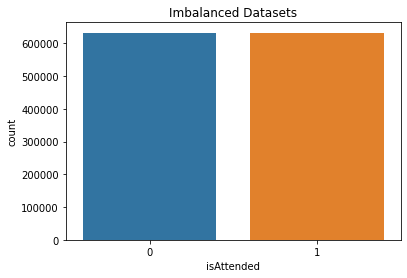

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('isAttended', data=oversampled_df)
plt.title("Imbalanced Datasets")
plt.show()

In [ ]:
oversampled_df.head()

,paid,isHost,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST,isAttended
0,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Using previous pca to transform the OVERSAMPLING DATA
after_pca_df = pca.transform(oversampled_trainx)


In [ ]:
after_pca_df.shape

(1265698, 29)

In [ ]:
oversampled_trainy

0          1
1          0
2          0
3          1
4          0
          ..
1265693    0
1265694    0
1265695    0
1265696    0
1265697    0
Name: isAttended, Length: 1265698, dtype: int64

In [ ]:
oversampled_trainx

,paid,isHost,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST
0,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265693,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1265694,1,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
from sklearn.model_selection import train_test_split

x = after_pca_df
y = oversampled_trainy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
x = oversampled_trainx
y = oversampled_trainy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print(pd.value_counts(oversampled_df.isAttended))

1    632849
0    632849
Name: isAttended, dtype: int64


In [ ]:
test_after_pca = pca.transform(test_dataframe)

In [ ]:
test_after_pca.shape

(128688, 29)

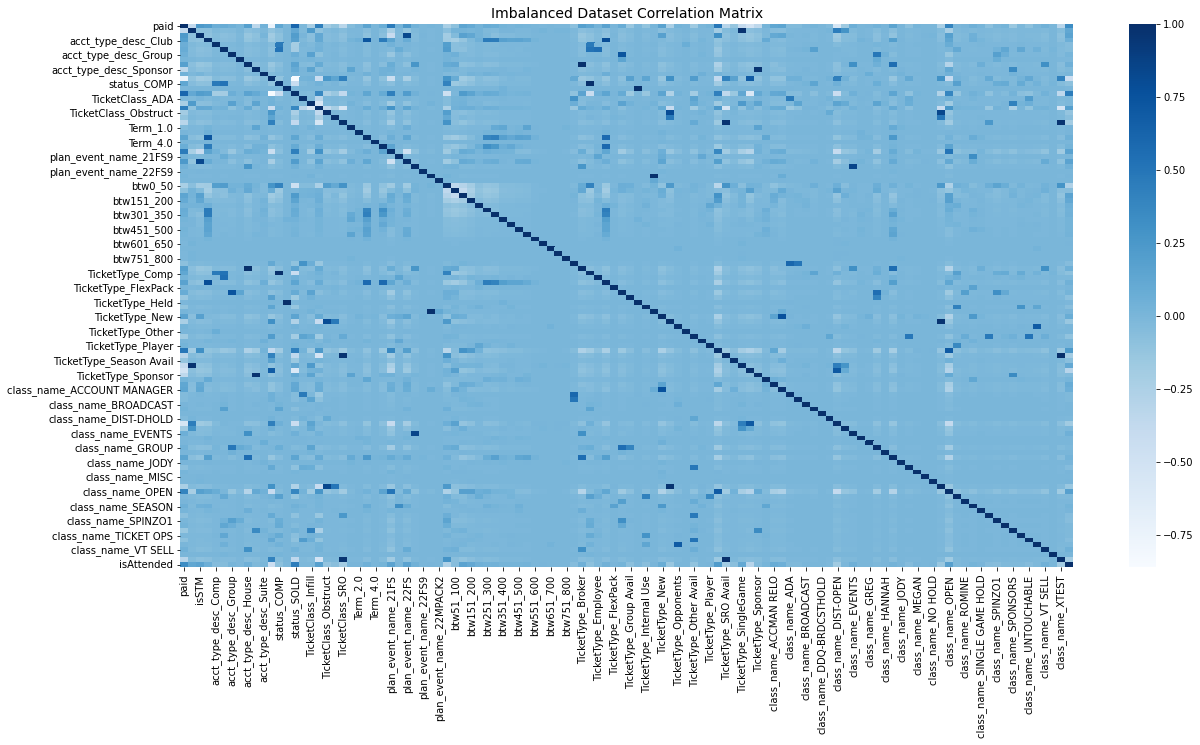

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
corr = oversampled_df.corr()
sns.heatmap(corr, cmap="Blues", ax=ax)
ax.set_title("Balanced Dataset Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
x_train.shape

(810759, 113)

**bold text** TEST CSV


In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.

param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(x_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression
param_grid3 = [
     {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['liblinear'] }
]

grid3 = GridSearchCV(LogisticRegression(), param_grid3, cv=10, verbose=0)
grid3.fit(x_train, y_train)

print('Tune Hyperparameters', grid3.best_params_)
print('Accuracy', grid3.best_score_)


NameError: ignored

In [ ]:
x.head()

,paid,isHost,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,acct_type_desc_Window Account,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST
0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
x_train = np.asarray(x_train).astype(np.float32)

In [ ]:
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
import numpy as np
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
# Neural networks 

nn_model = tf.keras.Sequential()
nn_model.add(tf.keras.layers.Dense(128, input_shape= (112,), activation='relu'))
nn_model.add(tf.keras.layers.Dropout(0.1))
nn_model.add(tf.keras.layers.Dense(64, activation='relu'))
nn_model.add(tf.keras.layers.Dropout(0.1))
nn_model.add(tf.keras.layers.Dense(10, activation='relu'))
nn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
27688/27688 [==============================] - 51s 2ms/step - loss: 0.5225 - accuracy: 0.7149
Epoch 2/10
27688/27688 [==============================] - 51s 2ms/step - loss: 0.5192 - accuracy: 0.7178
Epoch 3/10
27688/27688 [==============================] - 50s 2ms/step - loss: 0.5182 - accuracy: 0.7179
Epoch 4/10
27688/27688 [==============================] - 51s 2ms/step - loss: 0.5176 - accuracy: 0.7187
Epoch 5/10
27688/27688 [==============================] - 53s 2ms/step - loss: 0.5171 - accuracy: 0.7189
Epoch 6/10
27688/27688 [==============================] - 51s 2ms/step - loss: 0.5169 - accuracy: 0.7190
Epoch 7/10
27688/27688 [==============================] - 53s 2ms/step - loss: 0.5166 - accuracy: 0.7192
Epoch 8/10
27688/27688 [==============================] - 52s 2ms/step - loss: 0.5164 - accuracy: 0.7195
Epoch 9/10
27688/27688 [==============================] - 54s 2ms/step - loss: 0.5162 - accuracy: 0.7196
Epoch 10/10
27688/27688 [==============================

In [ ]:
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
y_pred = nn_model.predict(x_test)

print(y_pred[0])

11866/11866 [==============================] - 13s 1ms/step
[0.8128821]


In [ ]:
# We need to round it to 0 or 1.
for i in range(len(y_pred)):
 y_pred[i] = np.round(y_pred[i])


In [ ]:
for i in range(5):
  print(y_pred[i])

[1.]
[1.]
[1.]
[1.]
[0.]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.7214347791735798


In [ ]:

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_pred5 = ada.predict(x_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred5)
cnf_matrix

array([[100734,  88719],
       [ 19457, 170800]])

In [ ]:
from sklearn.metrics import classification_report
new_class =  classification_report(y_test, y_pred5)
print(new_class)


              precision    recall  f1-score   support

           0       0.84      0.53      0.65    189453
           1       0.66      0.90      0.76    190257

    accuracy                           0.72    379710
   macro avg       0.75      0.71      0.71    379710
weighted avg       0.75      0.72      0.71    379710



In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred5)
acc

0.7151088988965263

Text(0.5, 257.44, 'Predicted label')

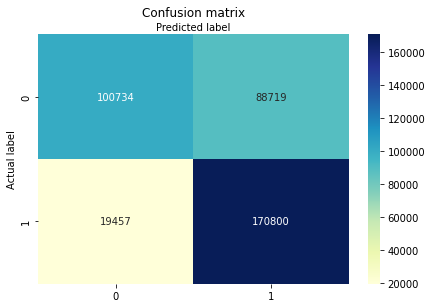

In [ ]:
# Confusion Matrix
from sklearn import metrics

cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



Text(0.5, 257.44, 'Predicted label')

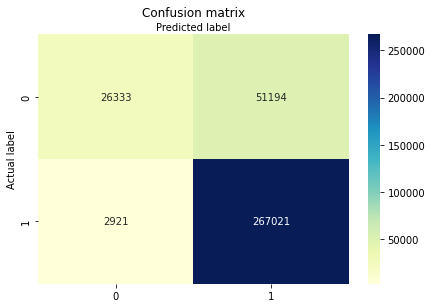

In [ ]:
# Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.34      0.49     77527
         1.0       0.84      0.99      0.91    269942

    accuracy                           0.84    347469
   macro avg       0.87      0.66      0.70    347469
weighted avg       0.85      0.84      0.82    347469



In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


XGB Classifier

In [ ]:
# XGBoost classifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid2 = {
    'max_depth': [5, 10, 20 , 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
}

xgb_model = XGBClassifier()
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid2,
                               cv=3,
                               n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


KeyboardInterrupt: ignored

In [ ]:
print(grid_search_xgb.best_params_)

In [ ]:
best_grid_xgb = grid_search_xgb.best_estimator_
predictions_gs_xgb = best_grid_xgb.predict(x_test)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost
xgb_model = xgboost.XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred3 = xgb_model.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred3)
print(cm)
print(classification_report(y_test, y_pred3))

[[101565  87888]
 [ 19357 170900]]
              precision    recall  f1-score   support

         0.0       0.84      0.54      0.65    189453
         1.0       0.66      0.90      0.76    190257

    accuracy                           0.72    379710
   macro avg       0.75      0.72      0.71    379710
weighted avg       0.75      0.72      0.71    379710



In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, f1_score
print(f1_score(y_test, y_pred))

0.7627651605205198


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred1))

[[104007  85446]
 [ 19698 170559]]


Text(0.5, 257.44, 'Predicted label')

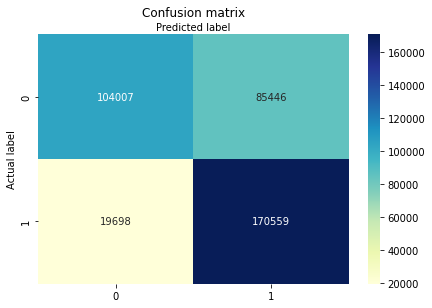

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
# Random Forest Classifier
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, y_pred1))
print(f1_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.55      0.66    189453
           1       0.67      0.90      0.76    190257

    accuracy                           0.72    379710
   macro avg       0.75      0.72      0.71    379710
weighted avg       0.75      0.72      0.71    379710

0.7643895290210683


In [ ]:
# Support Vector Machine
from sklearn import svm
SVM = svm.SVC()
SVM.fit(x_train, y_train)
y_pred2 = SVM.predict(x_test)


In [ ]:
# Support Vector Machine Classifier
print(classification_report(y_test, y_pred2))
print(f1_score(y_test, y_pred2))

In [ ]:
# Gaussian Naives bayes
from sklearn import naive_bayes
naive_bay = naive_bayes.GaussianNB()
naive_bay.fit(x_train, y_train)


NameError: ignored

In [ ]:
y_pred_g = naive_bay.predict()

In [ ]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, y_pred_g))
print(f1_score(y_test, y_pred_g))

In [ ]:
# Convert to Yes and No
x_val = test_dataframe.drop(columns=['UniqueID'])
y_val = clf.predict(x_val)

y_val_text = [('Yes' if i == 1 else 'No') for i in y_val]


for i in range(50):
  print(y_val_text[i])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


In [ ]:
test_dataframe['isAttended'] = y_val_text

In [ ]:
test_dataframe.head()

,paid,isHost,UniqueID,Resold,isSTM,acct_type_desc_Club,acct_type_desc_Comp,acct_type_desc_Employee,acct_type_desc_Group,acct_type_desc_Group NEW,acct_type_desc_House,acct_type_desc_Sponsor,acct_type_desc_Suite,status_AVAIL,status_COMP,status_HELD,status_SOLD,TicketClass_ADA,TicketClass_Infill,TicketClass_Manifest,TicketClass_Obstruct,TicketClass_Obstructed View,TicketClass_SRO,Term_1.0,Term_2.0,Term_3.0,Term_4.0,Term_5.0,plan_event_name_21FS,plan_event_name_21FS9,plan_event_name_22FS,plan_event_name_22FS8,plan_event_name_22FS9,plan_event_name_22MPACK,plan_event_name_22MPACK2,btw0_50,btw51_100,btw101_150,btw151_200,btw201_250,btw251_300,btw301_350,btw351_400,btw401_450,btw451_500,btw501_550,btw551_600,btw601_650,btw651_700,btw701_750,btw751_800,TicketType_ADA Avail,TicketType_Broker,TicketType_Comp,TicketType_Employee,TicketType_Existing,TicketType_FlexPack,TicketType_Group,TicketType_Group Avail,TicketType_Held,TicketType_Internal Use,TicketType_Marketing,TicketType_New,TicketType_Obstructed Avail,TicketType_Opponents,TicketType_Other,TicketType_Other Avail,TicketType_Other SOLD,TicketType_Player,TicketType_Renewal,TicketType_SRO Avail,TicketType_Season Avail,TicketType_SingleGame,TicketType_SingleGm Avail,TicketType_Sponsor,TicketType_Upgrade,class_name_ACCMAN RELO,class_name_ACCOUNT MANAGER,class_name_ADA,class_name_ADA INF,class_name_BROADCAST,class_name_COACH,class_name_DDQ-BRDCSTHOLD,class_name_DIST-DHOLD,class_name_DIST-OPEN,class_name_DOQ-BRDCSTHOLD,class_name_EVENTS,class_name_GENTILE,class_name_GREG,class_name_GROUP,class_name_HANNAH,class_name_JIM IRSAY,class_name_JODY,class_name_KILL SEATS,class_name_MEGAN,class_name_MISC,class_name_NO HOLD,class_name_OBSTRUCTED,class_name_OPEN,class_name_PLAYERS,class_name_ROMINE,class_name_SEASON,class_name_SINGLE GAME HOLD,class_name_SINGLE GAME SRO,class_name_SPINZO1,class_name_SPINZO2,class_name_SPONSORS,class_name_TICKET OPS,class_name_UNTOUCHABLE,class_name_VISITING TEAM,class_name_VT SELL,class_name_WAIT WEB,class_name_XTEST,isAttended
0,1,0,CLT21LV-101-10-1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes
1,1,0,CLT21LV-101-10-10,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes
2,1,0,CLT21LV-101-10-11,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes
3,1,0,CLT21LV-101-10-12,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes
4,1,0,CLT21LV-101-10-13,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes


In [ ]:
test_dataframe.isAttended

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
128683    Yes
128684    Yes
128685    Yes
128686    Yes
128687    Yes
Name: isAttended, Length: 128688, dtype: object

In [ ]:
sub_df = test_dataframe[['UniqueID', "isAttended"]]

In [ ]:
sub_df.head()

,UniqueID,isAttended
0,CLT21LV-101-10-1,Yes
1,CLT21LV-101-10-10,Yes
2,CLT21LV-101-10-11,Yes
3,CLT21LV-101-10-12,Yes
4,CLT21LV-101-10-13,Yes


In [ ]:
sub_df.shape

(128688, 2)

In [ ]:
sub_df.to_csv("Cross Road Analytics Competition Submission.csv", index=False)